<a href="https://colab.research.google.com/github/swaroop116/machine-learning-learn/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential


In [4]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saiswarooprachakonda
Your Kaggle Key: ··········


100%|██████████| 20.9k/20.9k [00:00<00:00, 13.5MB/s]

In [5]:
df = pd.read_csv("/content/netflix-stock-price-prediction/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [7]:
df.shape

(1009, 7)

<AxesSubplot:>

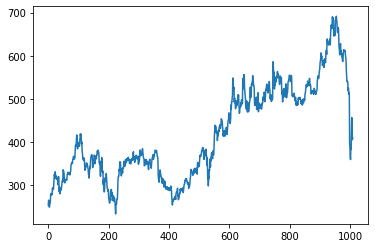

In [8]:
df['Adj Close'].plot()

In [10]:
output_var = pd.DataFrame(df['Adj Close']) 

In [11]:
features = ['Open', 'High', 'Low', 'Volume']

In [13]:
scaler = MinMaxScaler()
feature_tf = scaler.fit_transform(df[features])
feature_tf = pd.DataFrame(columns = features, data = feature_tf, index = df.index)
feature_tf.head()

,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


In [14]:
#Splits the csv data into sets for training the model (90% of the data) and testing the model (10% of the data)
timesplit = TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_tf):
        X_train, X_test = feature_tf[:len(train_index)], feature_tf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [15]:
# processing the data for the LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [16]:
X_train.shape

(918, 1, 4)

In [17]:
X_test.shape # displays the shape of X_train and X_test

(91, 1, 4)

In [18]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1)) 
lstm.compile(loss='mean_absolute_error', optimizer='adam')


In [19]:
model = lstm.fit(X_train, y_train, epochs = 150, batch_size = 8, verbose = 1)
# training the model on 150 epochs

Epoch 1/150
115/115 [==============================] - 3s 5ms/step - loss: 401.2551
Epoch 2/150
115/115 [==============================] - 1s 5ms/step - loss: 399.7323
Epoch 3/150
115/115 [==============================] - 1s 6ms/step - loss: 395.4422
Epoch 4/150
115/115 [==============================] - 1s 5ms/step - loss: 387.2952
Epoch 5/150
115/115 [==============================] - 1s 5ms/step - loss: 375.3386
Epoch 6/150
115/115 [==============================] - 0s 3ms/step - loss: 360.0502
Epoch 7/150
115/115 [==============================] - 0s 3ms/step - loss: 341.8843
Epoch 8/150
115/115 [==============================] - 0s 3ms/step - loss: 321.2350
Epoch 9/150
115/115 [==============================] - 0s 3ms/step - loss: 298.3723
Epoch 10/150
115/115 [==============================] - 0s 3ms/step - loss: 273.4496
Epoch 11/150
115/115 [==============================] - 0s 3ms/step - loss: 246.6746
Epoch 12/150
115/115 [==============================] - 0s 3ms/step - loss

In [20]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

3/3 [==============================] - 0s 9ms/step


In [21]:
MAE = metrics.mean_absolute_error(y_test, y_pred) # put the MAE of the model's product into the eponymous variable

In [22]:
MAE #display the MAE

6.208891780198318

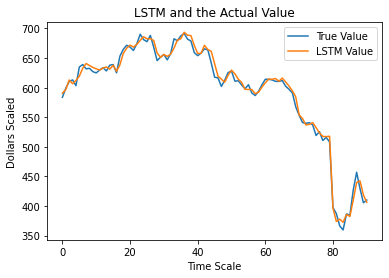

In [23]:
# Comparing the LSTM prediction and the actual value of the Adjusted for Close price via plot
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("LSTM and the Actual Value")
plt.xlabel('Time Scale')
plt.ylabel('Dollars Scaled')
plt.legend()
plt.show()